## 1. Load input image (various ways)

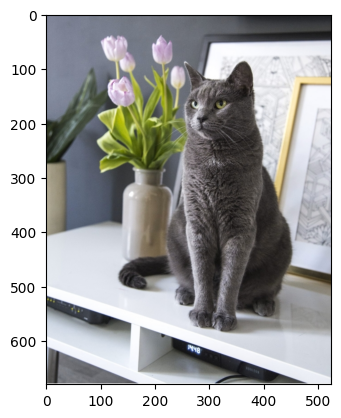

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

img_path = "/shared/demo/demo_images/cat.jpg"

image = mpimg.imread(img_path)
plt.imshow(image)
plt.show()

In [2]:
# 无论用什么库读取图片，都需要将其转换为numpy数组
print(type(image))

<class 'numpy.ndarray'>


## 2. Image Augmentations

In [6]:
import numpy as np
import cv2
from PIL import Image, ImageEnhance
import random

### 2.1 Rotation

In [4]:
# Function for small & random rotation
def rotate_image(image, angle_range=(-30, 30)):
    angle = random.uniform(*angle_range)
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR)
    return rotated_image

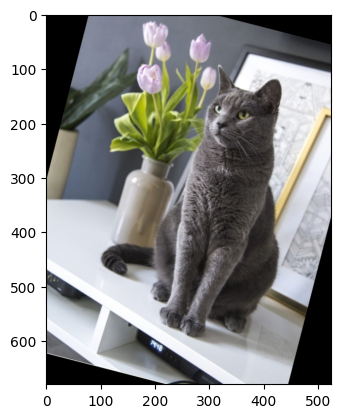

In [5]:
rotated = rotate_image(image)
plt.imshow(rotated)
plt.show()

### 2.2 Cropping

In [6]:
# Function for random cropping, keep 'percent' part of the image
def random_crop(image, percent=0.7):
    h, w = image.shape[:2]
    # crop_h, crop_w = crop_size
    crop_h = round(percent * h)
    crop_w = round(percent * w)

    top = random.randint(0, h - crop_h)
    left = random.randint(0, w - crop_w)
    cropped_image = image[top:top + crop_h, left:left + crop_w]
    return cropped_image

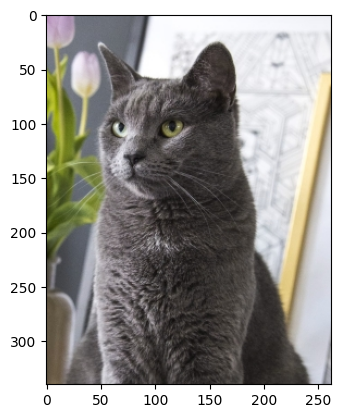

In [7]:
cropped = random_crop(image, percent=0.5)  # Example crop size
plt.imshow(cropped)
plt.show()

### 2.3 Saturation Adjustment

In [8]:
# Function for saturation adjustment, factor=5 is a good start
def adjust_saturation(image, factor=5):

    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    enhancer = ImageEnhance.Color(image_pil)
    saturated_image = enhancer.enhance(factor)
    return cv2.cvtColor(np.array(saturated_image), cv2.COLOR_RGB2BGR)

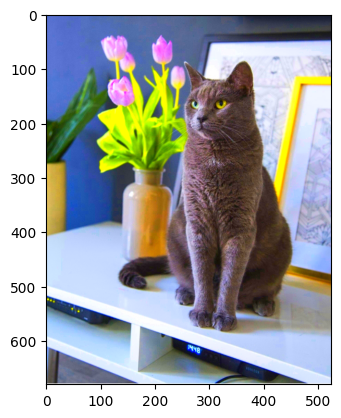

In [9]:
saturated = adjust_saturation(image, factor=5)
plt.imshow(saturated)
plt.show()

### 2.4 Art Style

In [10]:
# Function for artStyle conversion
def convert_to_artStyle(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold
    art_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 11, 2)
    return art_image

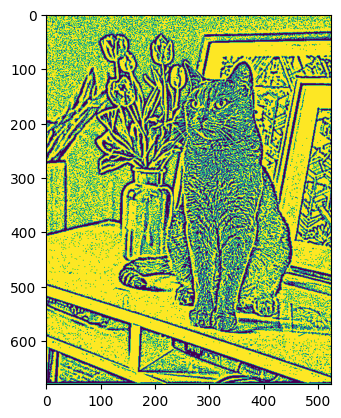

In [11]:
artStyle = convert_to_artStyle(image)
plt.imshow(artStyle)
plt.show()

### 2.5 Noise Injection

In [12]:
# Function for noise injection
def add_noise(image, mean=0, stddev=25):
    noise = np.random.normal(mean, stddev, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

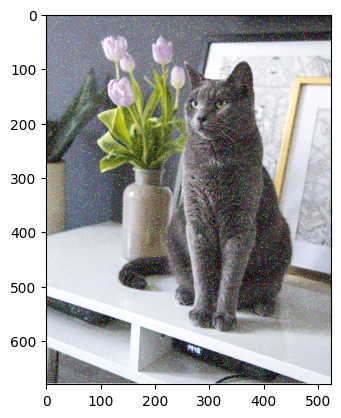

In [18]:
noisy = add_noise(image, stddev=0.6)
plt.imshow(noisy)
plt.show()

### 2.6 Blurring

In [19]:
# Function for blurring
def blur_image(image, kernel_size=(5, 5)):
    return cv2.GaussianBlur(image, kernel_size, 0)

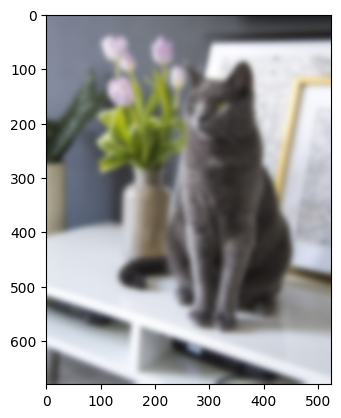

In [27]:
blurred = blur_image(image, kernel_size=(31,31))
plt.imshow(blurred )
plt.show()

### Putting it together

In [4]:
# This function will apply the augmentation to the image
# sin_aug: single augmentation, includes flip, rotate, crop, saturation, artStyle, noise, blur
# mul_aug: multiple augmentations in a list
# Return a dictionary. Key: augmentation name; Value: augmented image

def image_augumentation(ori_img, sin_aug = None, mul_aug = None):
    img = ori_img.copy()
    aug_img = {}
    if sin_aug:
        if sin_aug == 'flip':
            aug_img['flip'] = flip_image(img)
        elif sin_aug == 'rotate':
            aug_img['rotate'] = rotate_image(img)
        elif sin_aug == 'crop':
            aug_img['crop'] = random_crop(img)
        elif sin_aug == 'saturation':
            aug_img['saturation'] = adjust_saturation(img)
        elif sin_aug == 'artStyle':
            aug_img['artStyle'] = convert_to_artStyle(img)
        elif sin_aug == 'noise':
            aug_img['noise'] = add_noise(img)
        elif sin_aug == 'blur':
            aug_img['blur'] = blur_image(img)
        else:
            aug_img['original'] = img

    elif mul_aug:
        for aug in mul_aug:
            if aug == 'flip':
                aug_img['flip'] = flip_image(img)
            elif aug == 'rotate':
                aug_img['rotate'] = rotate_image(img)
            elif aug == 'crop':
                aug_img['crop'] = random_crop(img)
            elif aug == 'saturation':
                aug_img['saturation'] = adjust_saturation(img)
            elif aug == 'artStyle':
                aug_img['artStyle'] = convert_to_artStyle(img)
            elif aug == 'noise':
                aug_img['noise'] = add_noise(img)
            elif aug == 'blur':
                aug_img['blur'] = blur_image(img)
            else:
                aug_img['original'] = img
    else:
        aug_img['original'] = img
    return aug_img

def flip_image(image):
    img = np.flip(image, axis=1)
    return img

def rotate_image(image, angle_range=(-30, 30)):
    angle = random.uniform(*angle_range)
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR)
    return rotated_image

def random_crop(image, percent=0.7):
    h, w = image.shape[:2]
    # crop_h, crop_w = crop_size
    crop_h = round(percent * h)
    crop_w = round(percent * w)

    top = random.randint(0, h - crop_h)
    left = random.randint(0, w - crop_w)
    cropped_image = image[top:top + crop_h, left:left + crop_w]
    return cropped_image

def adjust_saturation(image, factor=5):

    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    enhancer = ImageEnhance.Color(image_pil)
    saturated_image = enhancer.enhance(factor)
    return cv2.cvtColor(np.array(saturated_image), cv2.COLOR_RGB2BGR)

def convert_to_artStyle(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold
    art_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 11, 2)
    return art_image

def add_noise(image, mean=0, stddev=25):
    noise = np.random.normal(mean, stddev, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

def blur_image(image, kernel_size=(5, 5)):
    return cv2.GaussianBlur(image, kernel_size, 0)

<class 'numpy.ndarray'>


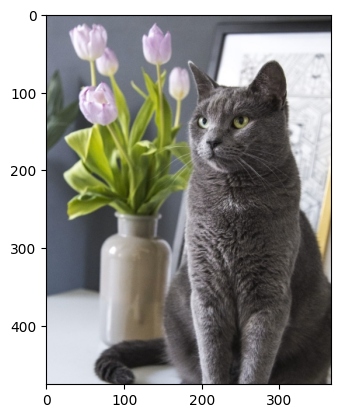

In [14]:
res = image_augumentation(image, sin_aug = 'crop')
result_img = res['crop']

print(type(result_img))
plt.imshow(result_img)
plt.show()